# Internet archive 'big data' for 'small histories' 

Note: this is a work in progress. 

The web has been around for 

* Outline of project
* reasoning 
* limitations 


### Getting the data

The first couple of steps will take place outside of this notebook but are fairly straight forward. The first thing we will need to do is to get the data we are going to be working wit. A collection of open data from the internet archive can be found [here](http://data.webarchive.org.uk/opendata/). The dataset we are looking at can be downloaded from [here](http://data.webarchive.org.uk/opendata/ukwa.ds.2/host-linkage/). The file is around 16GB so you may want to consider using a download manager to download the file. A download manager should speed things up a little but also make it easier to deal with any issues during the download. I use [aira](https://aria2.github.io/) but there are other out there. Make sure you have enought room to download the file. 

Once you have the file downloaded on your computer we could do a number of different things. 

In [34]:
import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import seaborn as sns
%matplotlib inline

### Importing data into Python

In [27]:
wellcome_data = pd.read_table('wellcome-linkage.tsv', names=['year','origin','link','times-linked'], sep='\||\t', engine='python')


In [28]:
wellcome_data[:10]

,year,origin,link,times-linked
0,1996,odin.neuro.soton.ac.uk,www.wellcome.ac.uk,1
1,1996,tarantula.wellcome.ac.uk,tarantula.wellcome.ac.uk,24
2,1996,www.ability.org.uk,www.tmr.wellcome.ac.uk,1
3,1996,www.healthindex.co.uk,www.tmr.wellcome.ac.uk,1
4,1997,atuin.chime.ucl.ac.uk,www.wellcome.ac.uk,10
5,1997,back.niss.ac.uk,www.wellcome.ac.uk,1
6,1997,bushmills.mic.dundee.ac.uk,www.wellcome.ac.uk,2
7,1997,com2.uclan.ac.uk,www.wellcome.ac.uk,7
8,1997,epidemic.zoo.ox.ac.uk,www.tmr.wellcome.ac.uk,2
9,1997,garbo.psychol.ucl.ac.uk,www.wellcome.ac.uk,5


### sorting data by times-linked

* sort by number of times linked


In [29]:
wellcome_data.sort_values(by='times-linked', ascending=0)[:20]

,year,origin,link,times-linked
14321,2004,www.wellcome.ac.uk,www.wellcome.ac.uk,619077
10467,2003,www.wellcome.ac.uk,www.wellcome.ac.uk,483541
26772,2008,www.wellcome.ac.uk,www.wellcome.ac.uk,247042
17552,2005,www.wellcome.ac.uk,www.wellcome.ac.uk,237786
23856,2007,www.wellcome.ac.uk,www.wellcome.ac.uk,180320
20498,2006,www.wellcome.ac.uk,www.wellcome.ac.uk,169626
10922,2004,library.wellcome.ac.uk,library.wellcome.ac.uk,134802
4921,2001,www.wellcome.ac.uk,www.wellcome.ac.uk,125546
14751,2005,library.wellcome.ac.uk,library.wellcome.ac.uk,114517
31673,2010,www.wellcome.ac.uk,www.wellcome.ac.uk,109542


In [46]:
wellcome_data.sort_values(by='origin', ascending=1)[:20]

,year,origin,link,times-linked
29272,2010,0-www.emeraldinsight.com.libsys.wellcome.ac.uk,catalogue.wellcome.ac.uk,3
29273,2010,0-www.emeraldinsight.com.libsys.wellcome.ac.uk,library.wellcome.ac.uk,1
29274,2010,2009.eif.co.uk,www.wellcome.ac.uk,6
10579,2004,21stcentury.co.uk,library.wellcome.ac.uk,1
10580,2004,21stcentury.co.uk,www.wellcome.ac.uk,1
20584,2007,23.me.uk,www.wellcome.ac.uk,1
17664,2006,23.me.uk,www.wellcome.ac.uk,3
14449,2005,23.me.uk,www.wellcome.ac.uk,3
23956,2008,23.me.uk,www.wellcome.ac.uk,1
20585,2007,3dmetrics.co.uk,www.wellcome.ac.uk,1


### Number of links over time

* number of links to and from the Wellome.ac.uk website. 

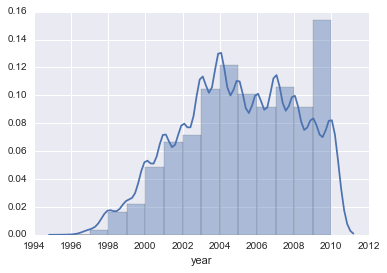

In [36]:

sns.distplot(wellcome_data['year'], bins=14)

Explanation for above

### Comparing 1996 to 2010 

In [37]:
wellcome_data1996 = wellcome_data[wellcome_data.year ==1996]
wellcome_data2010 = wellcome_data[wellcome_data.year ==2010]

In [44]:
shared_links = []
non_shared_links =[]

for link in wellcome_data['origin']:
    if link in wellcome_data['link']:
        shared_links.append(link)
    else:
        non_shared_links.append(link)
print(shared_links)


[]


### Looking at wellcome links to other websites
sort origin to only include wellcome.ac.uk domain. 


## Visualising links
* link to http://nbviewer.jupyter.org/github/anjackson/keeping-codes/blob/gh-pages/experiments/Visualising%20Link%20Dynamics.ipynb
* outline other approaches

In [3]:
with open('wellcome-linkage.tsv', 'r') as f:
    for line in f:
        print(line)
        row = line.rstrip().replace('|','\t').split("\t")
        print(row)
        break

1996|odin.neuro.soton.ac.uk|www.wellcome.ac.uk	1

['1996', 'odin.neuro.soton.ac.uk', 'www.wellcome.ac.uk', '1']


In [7]:
import time

def gource_format(line):
    row = line.rstrip().replace('|','\t').split("\t")
    timestamp = int(time.mktime(time.strptime(row[0], "%Y")))
    hostname = row[1]
    blhost = row[2]
    action = "A"
    colour = "FF0000"
    if( blhost.find("bl.uk") == -1 ):
        hostname = row[2]
        blhost = row[1]
        colour = "0000FF"
    #path = '/'.join(reversed(blhost.split('.')))
    #path = path +'/' + '/'.join(reversed(hostname.split('.')))
    path = '/'.join(reversed(hostname.split('.')))
    return "{}|{}|{}|{}|{}".format(timestamp,hostname,action,path,colour)
    
print(gource_format("1996|appserver.ed.ac.uk|portico.bl.uk	1"))


    

820454400|appserver.ed.ac.uk|A|uk/ac/ed/appserver|FF0000


In [8]:
# Open input and output files
with open('wellcome-linkage.tsv', 'r') as fin:
    with open('wellcome-linkage.log', 'w') as fout:
        counter = 0
        for line in fin:
            # Reformat:
            # for each line gource_format definition used
            new_line = gource_format(line)
            fout.write(new_line)
            fout.write('\n')
            
            # Also count:
            counter = counter + 1
            
            # Report progress:
            if( counter%10000 == 0 ):
                print(counter, line, new_line, '\n')
            
    # Report outcome:
    print("Wrote {} lines.".format(counter))
    fout.close()
    



10000 2003|www.wellcome.ac.uk|www.ch.cam.ac.uk	3
 1041379200|www.ch.cam.ac.uk|A|uk/ac/cam/ch/www|0000FF 

20000 2006|www.wellcome.ac.uk|www.breeam.org	2
 1136073600|www.breeam.org|A|org/breeam/www|0000FF 

30000 2010|wisdomnet.co.uk|www.wellcome.ac.uk	5
 1262304000|www.wellcome.ac.uk|A|uk/ac/wellcome/www|0000FF 

Wrote 31766 lines.
